# Churn Reduction


#### Project Description :
    
Churn (loss of customers to competition) is a problem for companies because it is more expensive to acquire a new customer than to keep your existing one from leaving. This problem statement is targeted at enabling churn reduction using analytics concepts. We have to Churn Rate on the basis of their usage data.


#### Loading Libraries & Data

In [1]:
# Importing Libraries

import os        
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# %matplotlib inline

In [2]:
#Setting working directory
os.chdir("E:/DS/Project/Churn Reduction")
print(os.getcwd())

#Loading Dataset
train = pd.read_csv("Train_data.csv")
test = pd.read_csv("Test_data.csv")

E:\DS\Project\Churn Reduction


#### Exploring Data

In [7]:
train.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [8]:
#Checking info of data as data types and rows n cols
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                            3333 non-null object
account length                   3333 non-null int64
area code                        3333 non-null int64
phone number                     3333 non-null object
international plan               3333 non-null object
voice mail plan                  3333 non-null object
number vmail messages            3333 non-null int64
total day minutes                3333 non-null float64
total day calls                  3333 non-null int64
total day charge                 3333 non-null float64
total eve minutes                3333 non-null float64
total eve calls                  3333 non-null int64
total eve charge                 3333 non-null float64
total night minutes              3333 non-null float64
total night calls                3333 non-null int64
total night charge               3333 non-null float64
total intl minutes           

In [9]:
train.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [3]:
#Droping phone.number because it won't have any effect
train = train.drop('phone number',axis=1)
test = test.drop('phone number',axis=1)

In [4]:
#All continous variables in cname
cname = train.columns[(train.dtypes=="float64")|(train.dtypes=="int64")].tolist()
print(cname)

#All categorical var in cat_names and removing target var
cat_names = train.select_dtypes(exclude=np.number).columns.tolist()
cat_names.remove('Churn')
cat_names

['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'number customer service calls']


['state', 'international plan', 'voice mail plan']

In [10]:
train['international plan'].value_counts()

 no     3010
 yes     323
Name: international plan, dtype: int64

#### Checking Missing Value in Data

In [11]:
#Checking missing values in train dataset
print(train.isnull().sum())  

#no missing value present in the train data

state                            0
account length                   0
area code                        0
international plan               0
voice mail plan                  0
number vmail messages            0
total day minutes                0
total day calls                  0
total day charge                 0
total eve minutes                0
total eve calls                  0
total eve charge                 0
total night minutes              0
total night calls                0
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
Churn                            0
dtype: int64


In [12]:
#Checking missing values in test data set
print(test.isnull().sum())  

#no missing value present in the test data

state                            0
account length                   0
area code                        0
international plan               0
voice mail plan                  0
number vmail messages            0
total day minutes                0
total day calls                  0
total day charge                 0
total eve minutes                0
total eve calls                  0
total eve charge                 0
total night minutes              0
total night calls                0
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
Churn                            0
dtype: int64


 No missing value found in both train and test data set

#### Visualizing data

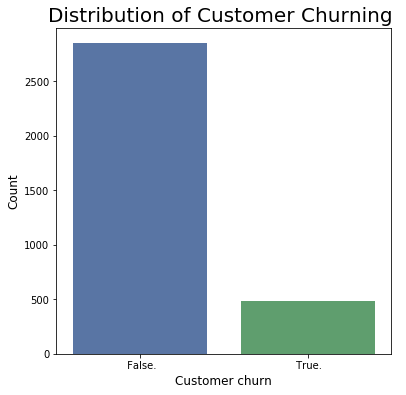

In [13]:
#Target Variable data distribution
plt.figure(figsize=(6,6))
sns.countplot(x = train.Churn,palette='deep')
plt.xlabel('Customer churn', fontsize= 12)
plt.ylabel('Count', fontsize= 12)
plt.title("Distribution of Customer Churning ",fontsize= 20)
plt.show()

###### It is clear that we have a Class Imbalance problem

In [14]:
#Groupby --> size to represent ---> unstack the category
#train.groupby(["state", "Churn"]).size().unstack(level=-1).head()

#Relationational bar graph for checking data distribution with respect to target variable
def diff_bar(x,y):
    
    train.groupby([x,y]).size().unstack(level=-1).plot(kind='bar', figsize=(35,10))
    plt.xlabel(x,fontsize= 25)
    plt.ylabel('count',fontsize= 25)
    plt.legend(loc=0,fontsize= 25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title("{X} Vs {Y}".format(X=x,Y=y),fontsize = 40)
    plt.show()

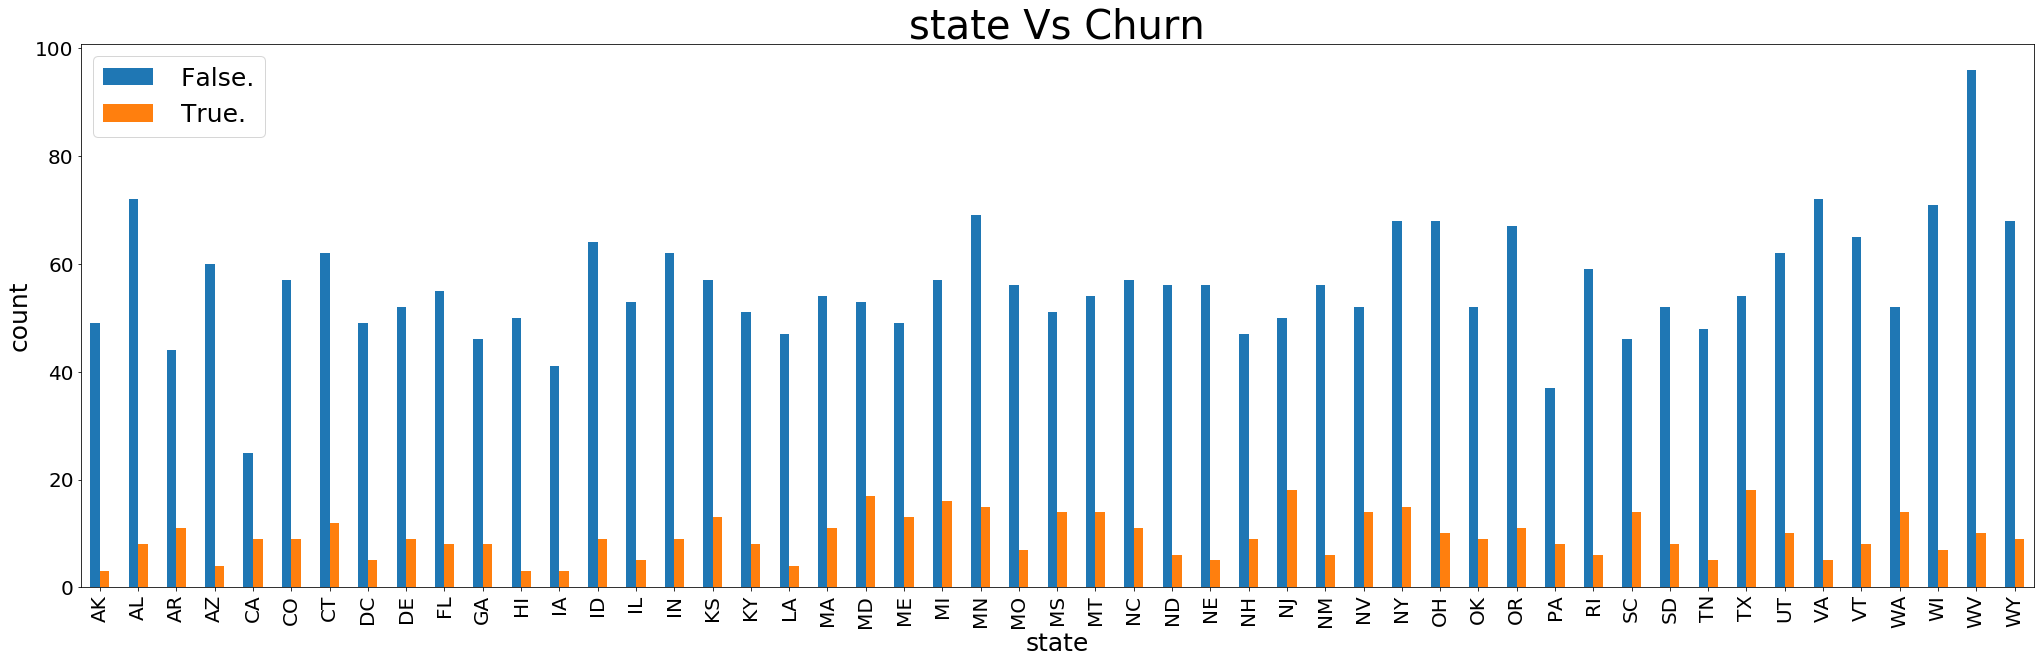

In [48]:
#State Wise Churning of customer
diff_bar('state','Churn')

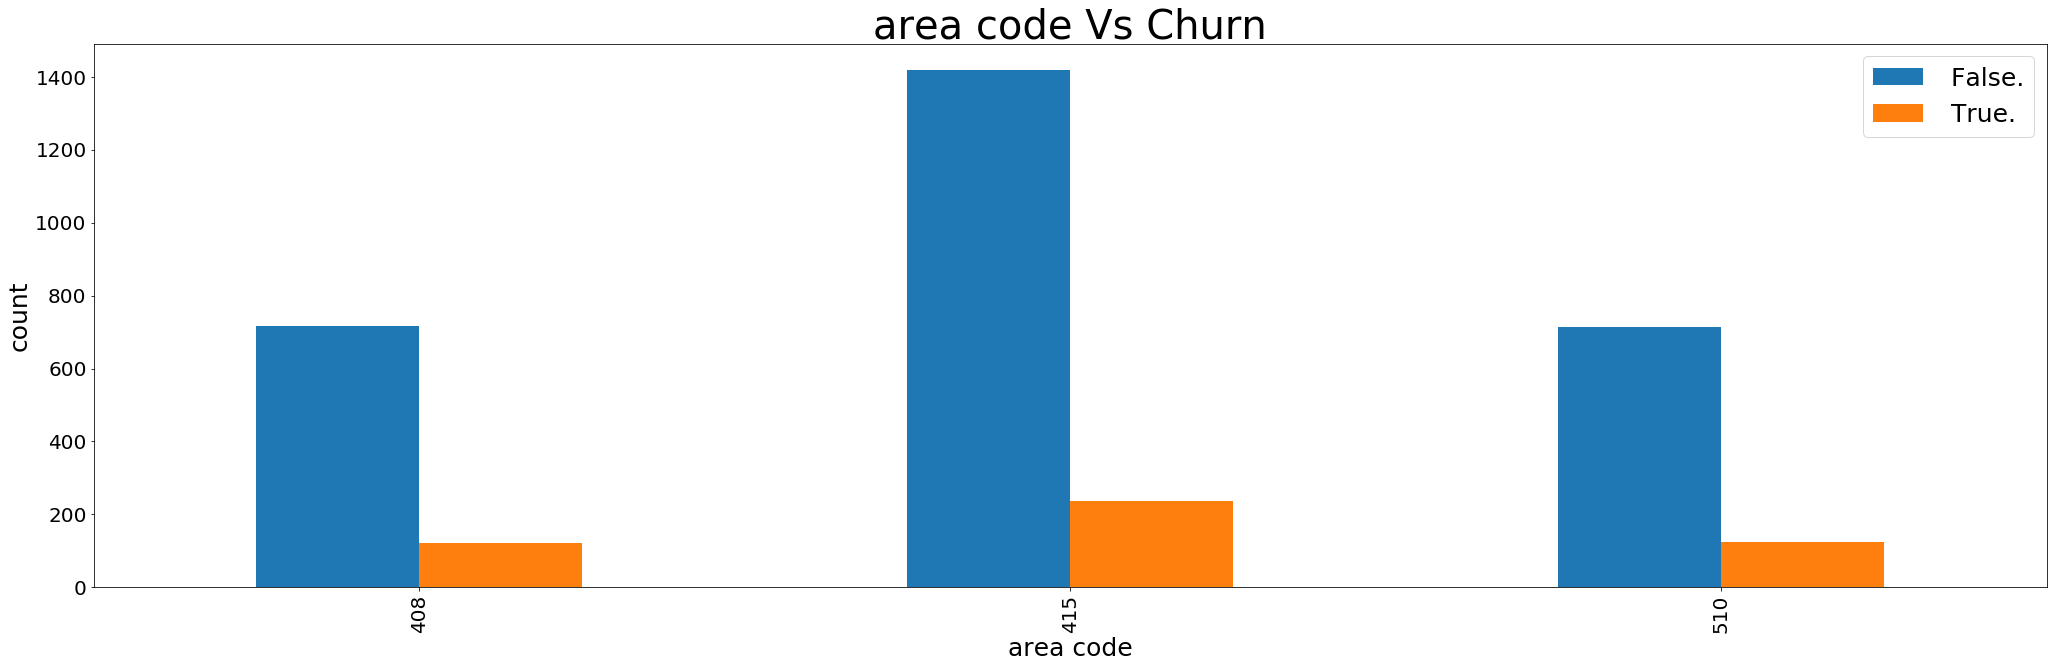

In [49]:
#area_code Wise Churning of customer
diff_bar('area code','Churn')

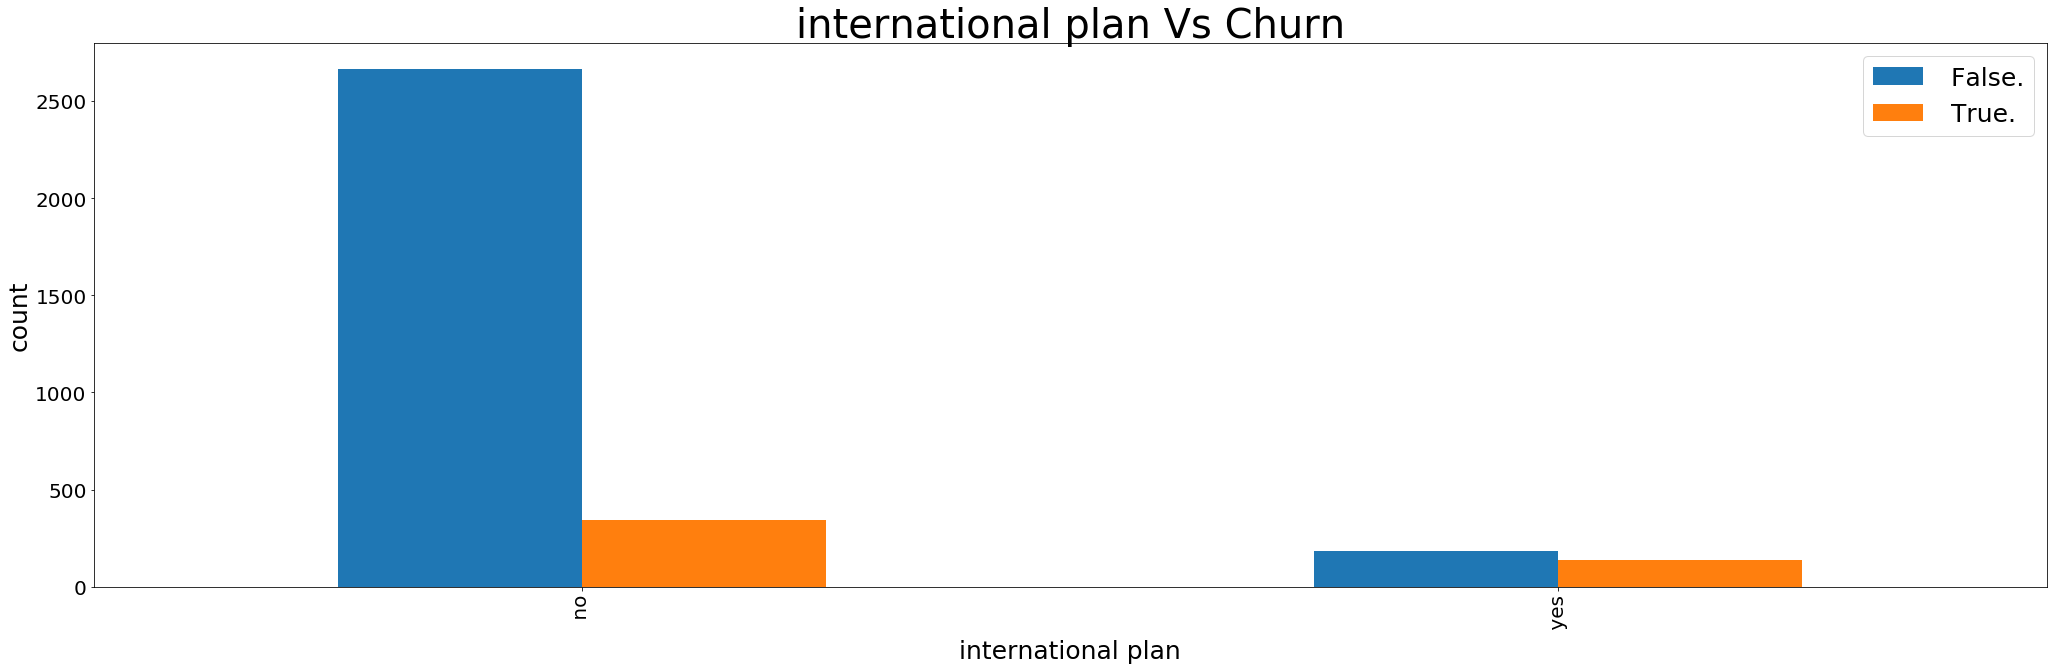

In [50]:
#International_Plan Wise Churning of customer
diff_bar('international plan','Churn')

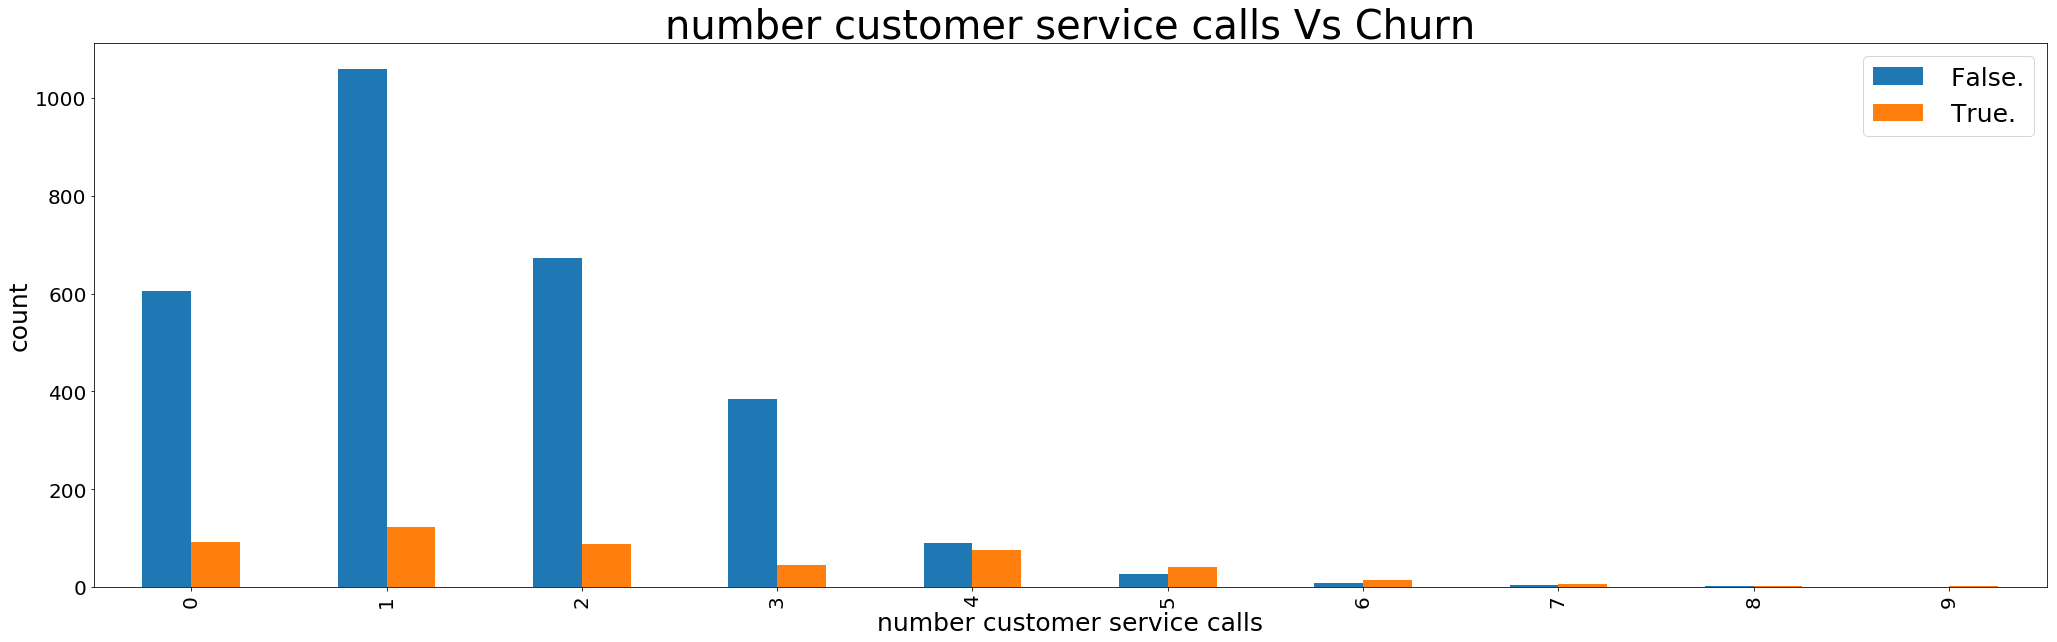

In [52]:
#Number of Customer_Service Call Wise Churning of customer
diff_bar('number customer service calls','Churn')

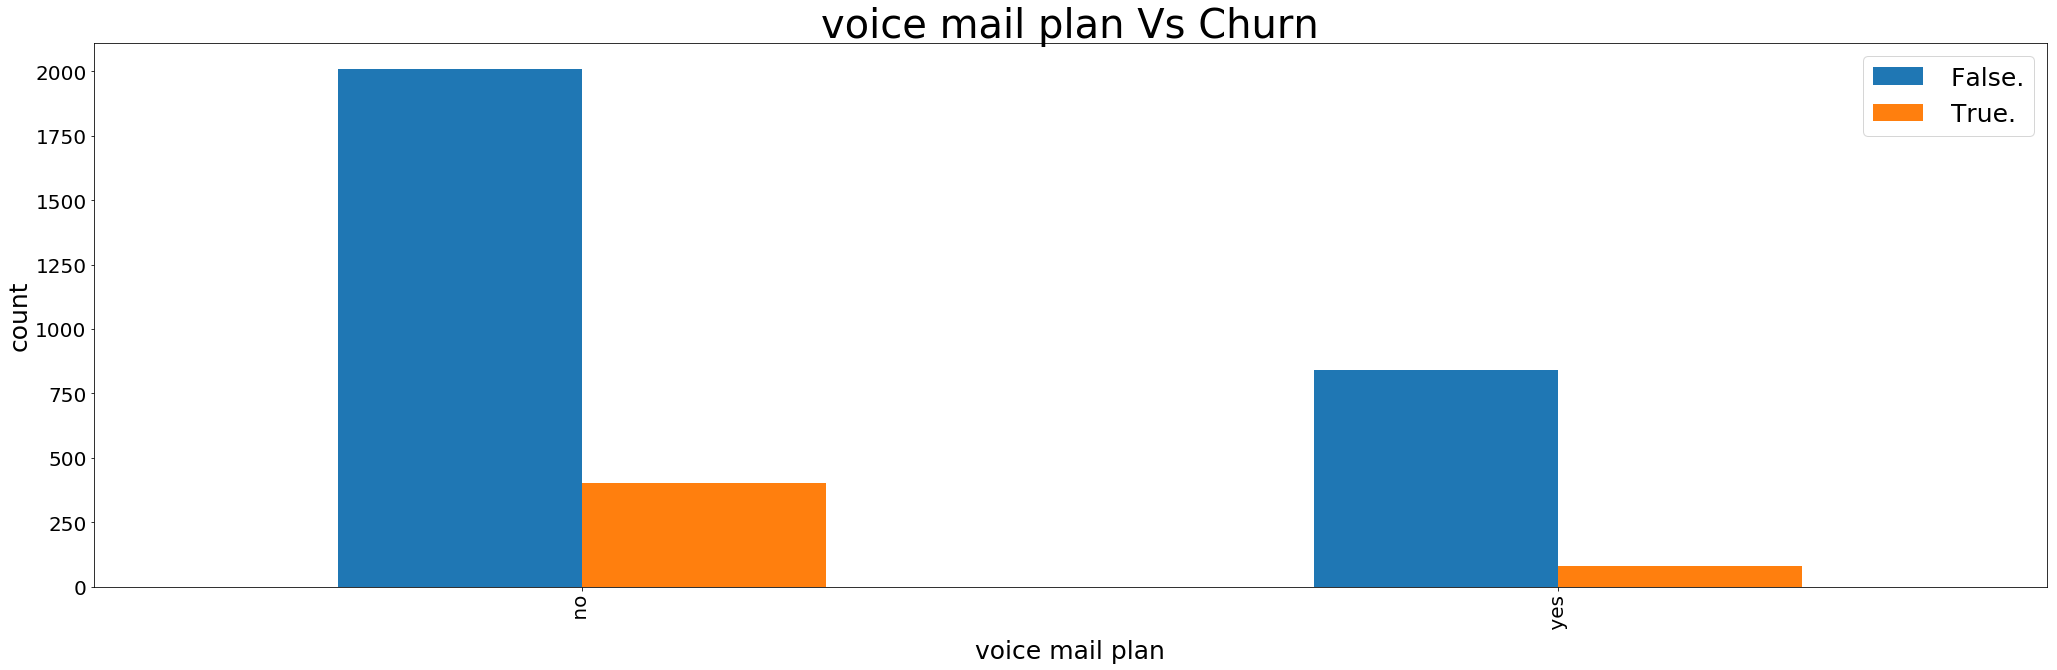

In [54]:
#No. of Customer Churning and had a Voice mail plan
diff_bar('voice mail plan','Churn')

In [15]:
#Scatter plot function
def diff_scattr(x,y):
    fig = plt.figure()
    fig = sns.lmplot(x,y, data=train,fit_reg=False)
    plt.xlabel(x,fontsize= 14)
    plt.ylabel(y,fontsize= 14)
    plt.xticks(fontsize=10, rotation=90)
    plt.yticks(fontsize=10)
    plt.title("{X} and {Y} Scatter Plot".format(X=x,Y=y),fontsize = 16)
    #fig.savefig("{X}_and_{Y}_Scatter_Plot..png".format(X=x,Y=y))
    plt.show()

<Figure size 432x288 with 0 Axes>

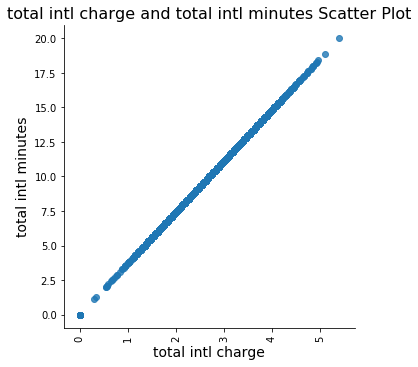

In [8]:
#Total intl charge and Total intl Minute
diff_scattr('total intl charge','total intl minutes')

<Figure size 432x288 with 0 Axes>

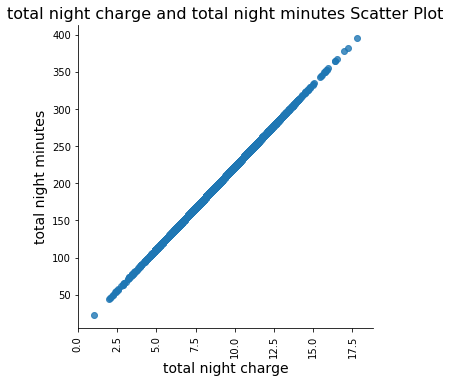

In [9]:
## Total night charge and Total night Minute
diff_scattr('total night charge','total night minutes')

<Figure size 432x288 with 0 Axes>

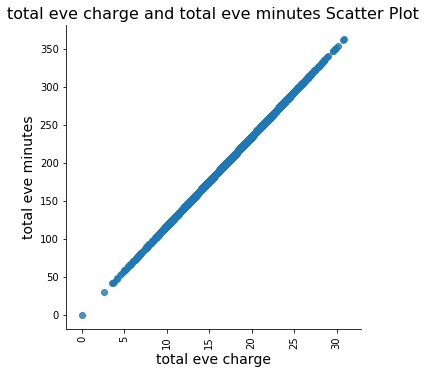

In [10]:
#Total eve charge and Total eve Minute
diff_scattr('total eve charge','total eve minutes')

<Figure size 432x288 with 0 Axes>

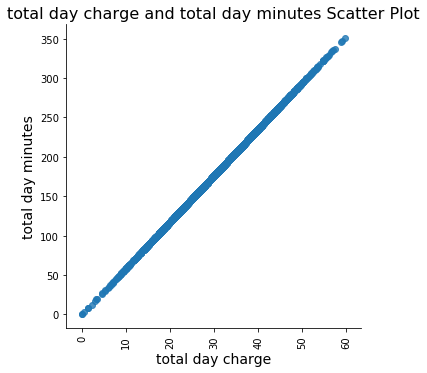

In [16]:
#Total day charge and Total Day Minute
diff_scattr('total day charge','total day minutes')

#### Changing Categorical colum values to numeric codes

In [5]:
#function for converting categoric to num codes
def cat_to_num(df):
    for i in range(0, df.shape[1]):
        #print(i)
        if(df.iloc[:,i].dtypes == 'object'):
            df.iloc[:,i] = pd.Categorical(df.iloc[:,i])
            df.iloc[:,i] = df.iloc[:,i].cat.codes
            df.iloc[:,i] = df.iloc[:,i].astype('object')
    return df

In [6]:
train = cat_to_num(train)
test = cat_to_num(test)

#### Anomaly Detections or Outlier Analysis

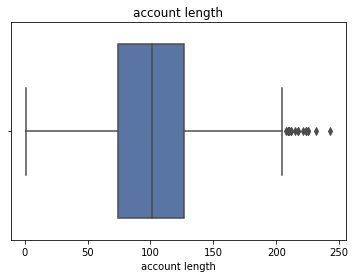

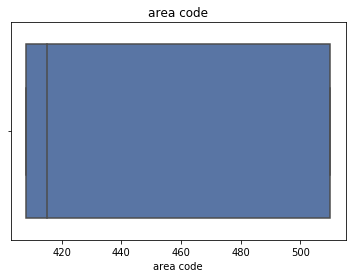

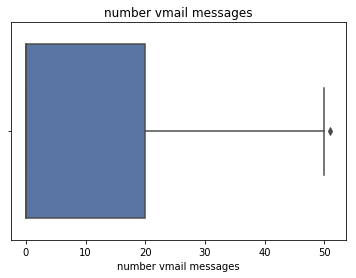

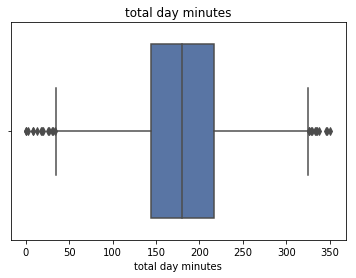

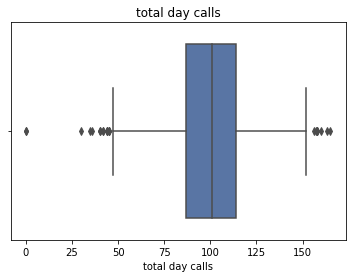

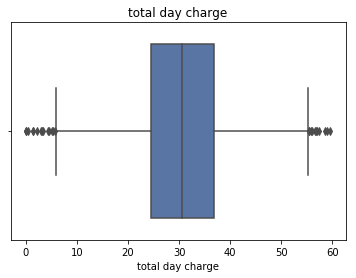

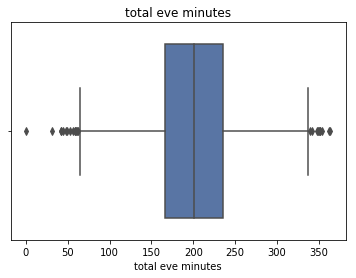

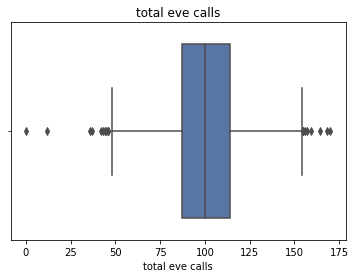

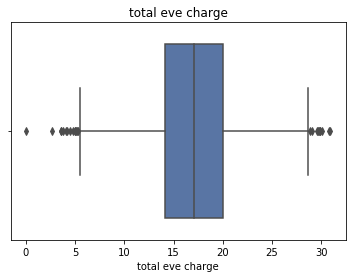

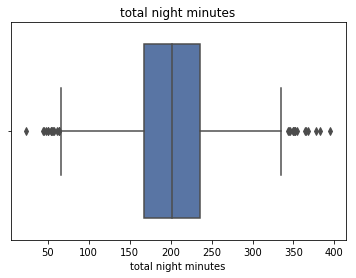

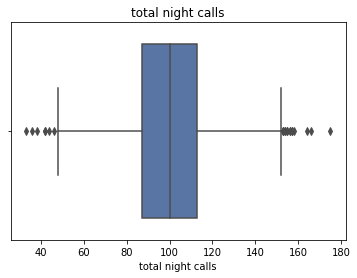

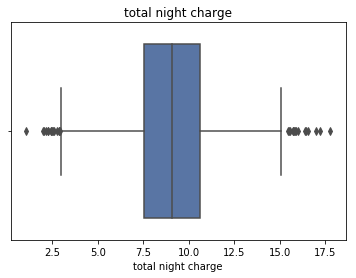

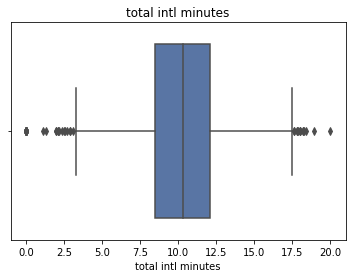

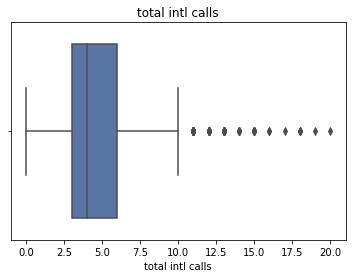

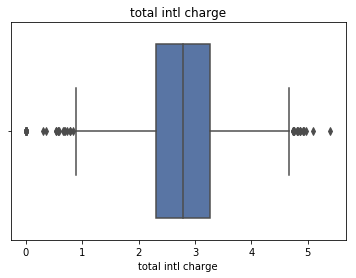

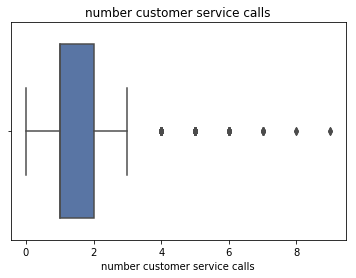

In [59]:
# #Plotting Box Plot
for i in cname:
    plt.figure()
    plt.clf() #clearing the figure
    sns.boxplot(train[i],palette="deep")
    plt.title(i)
    plt.show()

In [7]:
#Treating Out Liers and Converting them to nan
for i in cname:
    #print(i)
    q75, q25 = np.percentile(train.loc[:,i], [75 ,25])
    iqr = q75 - q25
    minn = q25 - (iqr*1.5)
    maxx = q75 + (iqr*1.5)
#Converting to nan
    train.loc[train.loc[:,i] < minn,i] = np.nan
    train.loc[train.loc[:,i] > maxx,i] = np.nan
    print('{var} -----> {X}   Missing'.format(var = i, X = (train.loc[:,i].isnull().sum())))

account length -----> 18   Missing
area code -----> 0   Missing
number vmail messages -----> 1   Missing
total day minutes -----> 25   Missing
total day calls -----> 23   Missing
total day charge -----> 25   Missing
total eve minutes -----> 24   Missing
total eve calls -----> 20   Missing
total eve charge -----> 24   Missing
total night minutes -----> 30   Missing
total night calls -----> 22   Missing
total night charge -----> 30   Missing
total intl minutes -----> 46   Missing
total intl calls -----> 78   Missing
total intl charge -----> 49   Missing
number customer service calls -----> 267   Missing


In [8]:
# Imputing with mean because fancyimpute not working
for i in cname:
    print (i)
    train = train.apply(lambda x:x.fillna(train.loc[:,i].mean()))   
    

account length
area code
number vmail messages
total day minutes
total day calls
total day charge
total eve minutes
total eve calls
total eve charge
total night minutes
total night calls
total night charge
total intl minutes
total intl calls
total intl charge
number customer service calls


In [25]:
train.head(1)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False.


### Feature Selections

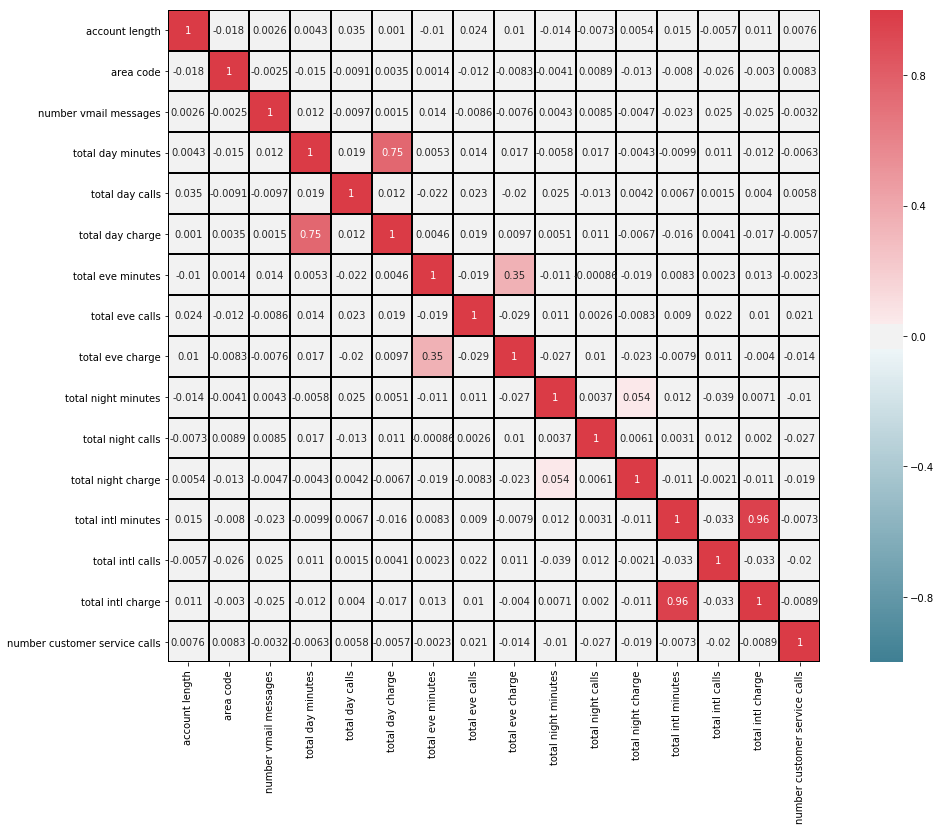

In [10]:
#Setting up the pane or matrix size
f, ax = plt.subplots(figsize=(18,12))  #Width,height

#Generating Corelation Matrix
corr = train[cname].corr()

#Plot using Seaborn library
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),\
            square=True, ax=ax,annot=True,linewidths=1 , linecolor= 'black',vmin = -1, vmax = 1)

plt.show()
#f.savefig('heatmap.png')

#### Chi-Square for Categorical variables

In [11]:
#checking Relation b/w categorical variables with respect to target var
from scipy.stats import chi2_contingency
for i in cat_names:
    print(i)
    #As we know imput to chi square is always a contiguency table so we generating it using crostab function present in pd
    chi2, p, dof, ex =chi2_contingency(pd.crosstab(train['Churn'],train[i]))
    #as above pd.crosstab(dependent variable , independent variable)
    print(p)
    
#chi2 = Actual chi square test value
#p = pvalue
#dof = degree of freedom
#ex = expected value

# As if p value is less than 0.05 then we will reject null hypothesis
#Null = both the variables are independent
#Alternate = Both the variables are not independent

state
0.002296221552011188
international plan
2.4931077033159556e-50
voice mail plan
5.15063965903898e-09


In [9]:
#Removing correlated variable & the variable which doesn't contain any meaning full info
rmev = ['state','total day charge','total eve charge','total night charge','total intl charge']
train = train.drop(rmev,axis=1)
test = test.drop(rmev,axis=1)

In [11]:
#Updating values _after removal of var
cname = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total eve minutes',
         'total eve calls', 'total night minutes', 'total night calls', 'total intl minutes', 'total intl calls',
         'number customer service calls']

#All categorical var and removing target var
cat_names = ['area code', 'international plan', 'voice mail plan']

print('cname :- {}'.format(cname))
print()
print('cat_name :- {}'.format(cat_names))

cname :- ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total eve minutes', 'total eve calls', 'total night minutes', 'total night calls', 'total intl minutes', 'total intl calls', 'number customer service calls']
()
cat_name :- ['area code', 'international plan', 'voice mail plan']


###  Feature Scaling

##### Checking Distribution of data

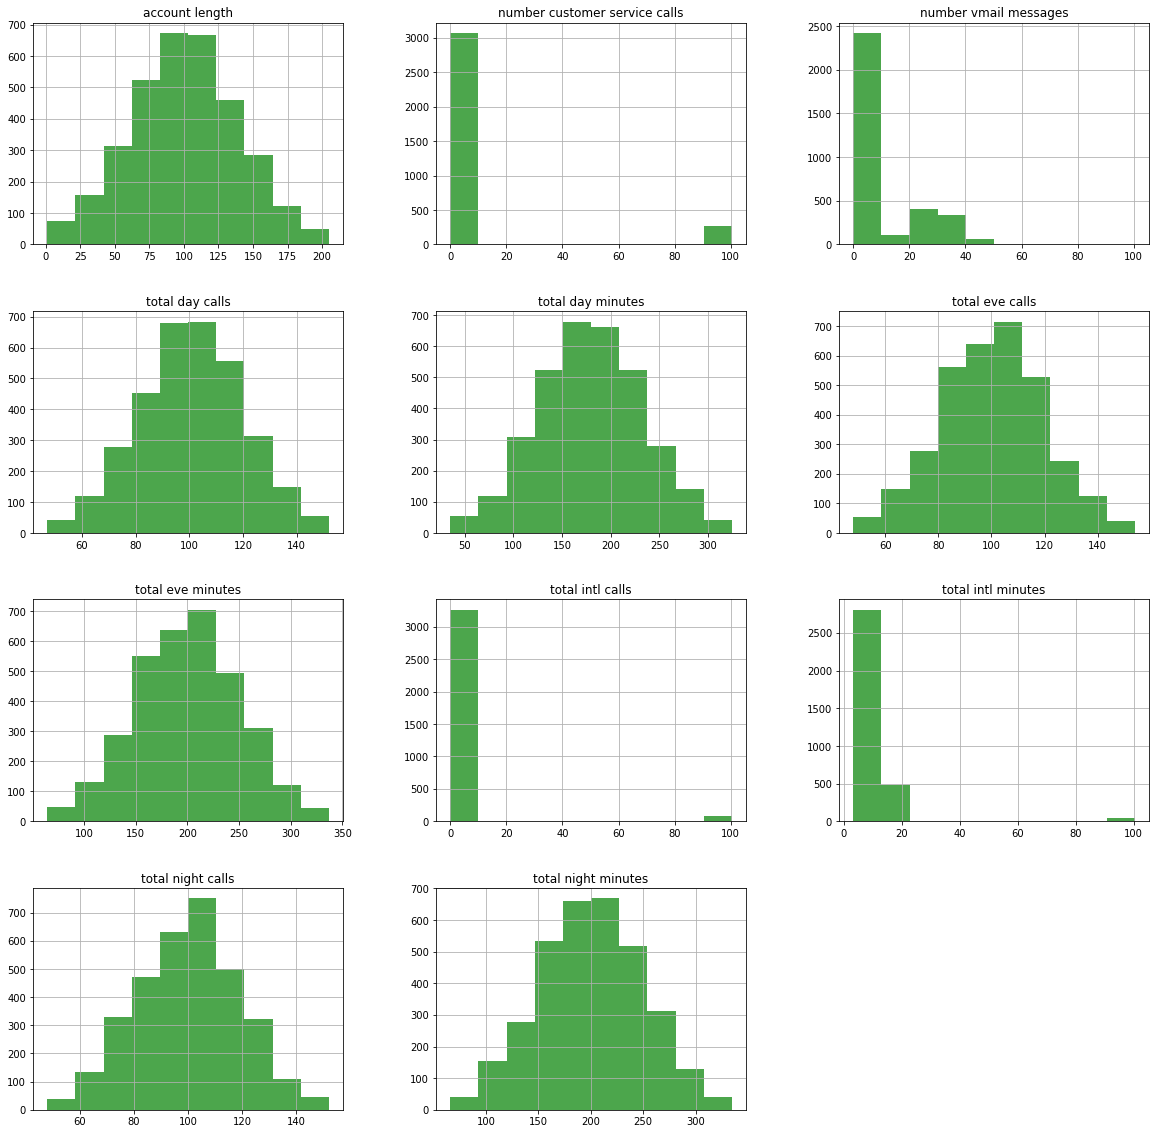

In [47]:
#Checking distribution of data via pandas visualization
train[cname].hist(figsize=(20,20),color='g',alpha = 0.7)
#plt.savefig('distribution.png')
plt.show()

In [14]:
# #Histogram breaks down by target variable
def plot_hist_y(x,y):
    plt.hist(list(x[y == 1]),color='green',label='True',bins='auto')
    plt.hist(list(x[y == 0]),color='grey', alpha = 0.7, label='False',bins='auto')
    plt.title("Histogram of {var} breakdown by {Y}".format(var = x.name,Y=y.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc="upper right")
    plt.savefig("Histogram of {var} breakdown by {Y}.png".format(var = x.name,Y=y.name))
    plt.show()

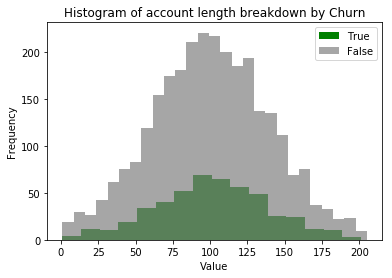

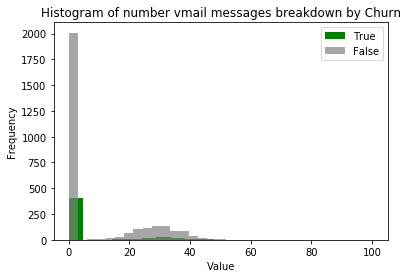

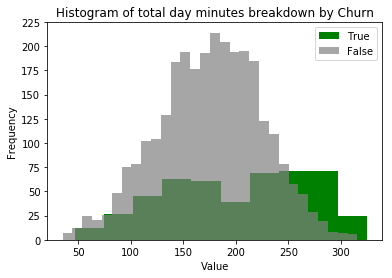

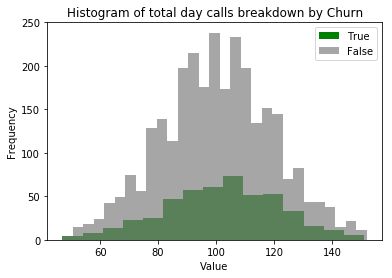

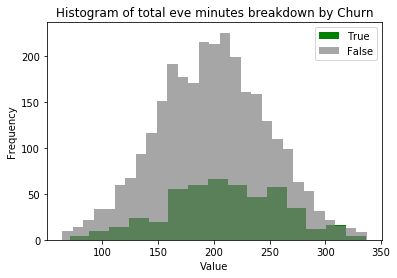

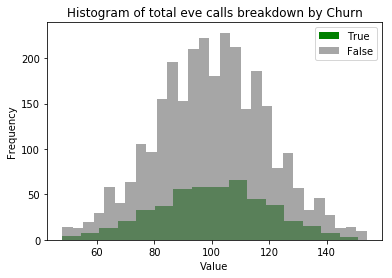

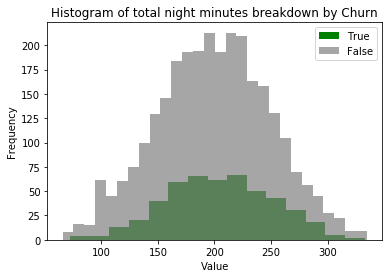

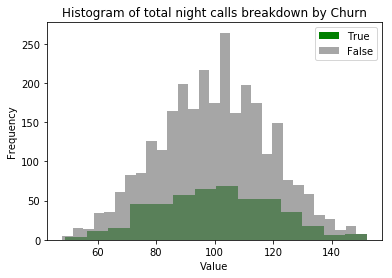

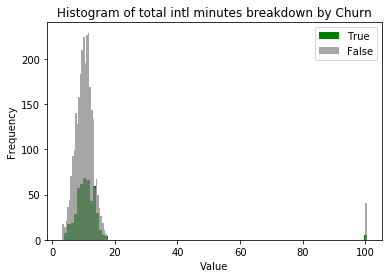

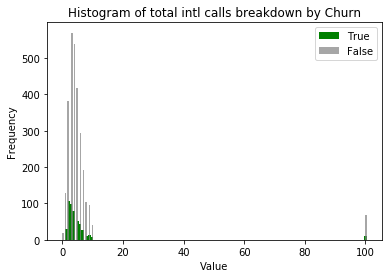

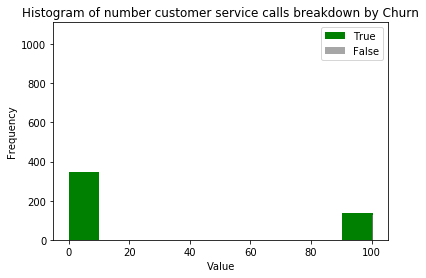

In [15]:
for i in cname:
    #print(i)
    plot_hist_y(train[i],train.Churn)

###### As most of the data is uniformally distributed , Hence Using data Standardization/Z-Score here

### Scalling

In [12]:
#Applying standarization as most of the variables are normalized distributed
def scale_standard(df):
    for i in cname:
        #print(i)
        df[i] = (df[i] - df[i].mean())/df[i].std()
    return df

In [13]:
#Standardizing Scale
train = scale_standard(train)
test = scale_standard(test)

In [52]:
train.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,number customer service calls,Churn
0,0.709198,415.0,no,yes,1.227063,1.614493,0.486477,-0.061297,-0.060385,0.907666,-0.472959,-0.141945,-0.240350,-0.306021,False.
1,0.168995,415.0,no,yes,1.299730,-0.334191,1.158303,-0.099474,0.146749,1.104287,0.159308,0.199671,-0.240350,-0.306021,False.
2,0.940714,415.0,no,no,-0.589607,1.205928,0.693193,-1.592403,0.509234,-0.756514,0.211997,0.061178,-0.104152,-0.343155,False.
3,-0.422657,408.0,yes,no,-0.589607,2.260289,-1.528998,-2.009730,-0.630004,-0.061248,-0.578336,-0.455862,0.032046,-0.268888,False.
4,-0.654173,415.0,yes,no,-0.589607,-0.238169,0.641514,-1.047876,1.130637,-0.263949,1.107708,-0.132712,-0.240350,-0.231755,False.


### Sampling Data For Train and Test

#### Stratified Sampling

In [14]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
#Using train test split functionality for creatuing sampling
X = train.iloc[:,:14]
y = train.iloc[:,14]
y=y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# Before smote y_train
# 0    1895
# 1     338

In [110]:
(X_train.shape),(y_train.shape)

((2233, 14), (2233,))

### Using SMOTE   ( SMOTE: Synthetic Minority Over-sampling Technique)
<br \>
Due to target variable imbalance, it's good to over sample the minority class . 

In [21]:
!pip install imblearn

In [15]:
from imblearn.over_sampling import SMOTE

Smo = SMOTE(random_state=101)
X_train_res, y_train_res = Smo.fit_sample(X_train,y_train)

In [112]:
(X_train_res.shape,y_train_res.shape)

((3790, 14), (3790,))

### Prediction function

In [23]:
#Predicting & Stats Function

def pred(model_object,predictors,compare):
    """1.model_object = model name
       2.predictors = data to be predicted
       3.compare = y_train"""
    predicted = model_object.predict(predictors)
    # Determine the false positive and true positive rates
    cm = pd.crosstab(compare,predicted)
    TN = cm.iloc[0,0]
    FN = cm.iloc[1,0]
    TP = cm.iloc[1,1]
    FP = cm.iloc[0,1]
    print("CONFUSION MATRIX ------->> ")
    print(cm)
    print()
    
    ##check accuracy of model
    print('Classification paradox :------->>')
    print('Accuracy :- ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
    print()
    print('Specificity //  True Negative Rate :- ',round((TN*100)/(TN+FP),2))
    print()
    print('Sensivity // True Positive Rate // Recall :- ',round((TP*100)/(FN+TP),2))
    print()
    print('False Negative Rate :- ',round((FN*100)/(FN+TP),2))
    print()
    print('False Postive Rate :- ',round((FP*100)/(FP+TN),2))
    print()
    print(classification_report(compare,predicted))




### Model Level Approach

#### Just to check which models fits good without optimization




### RandomForest

In [25]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
#Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100,random_state=101).fit(X_train_res,y_train_res)

#Model Score on Valdation Data Set
pred(rf_model,X_test,y_test)

# Accuracy :-  93.0
# Specificity //  True Negative Rate :-  95
# Sensivity // True Positive Rate // Recall :-  80.0
# False Negative Rate :-  20.0
# False Postive Rate :-  4.0

CONFUSION MATRIX ------->> 
col_0    0    1
Churn          
0      914   41
1       29  116
()
Classification paradox :------->>
('Accuracy :- ', 93.0)
()
('Specificity //  True Negative Rate :- ', 95.0)
()
('Sensivity // True Positive Rate // Recall :- ', 80.0)
()
('False Negative Rate :- ', 20.0)
()
('False Postive Rate :- ', 4.0)
()
             precision    recall  f1-score   support

          0       0.97      0.96      0.96       955
          1       0.74      0.80      0.77       145

avg / total       0.94      0.94      0.94      1100



### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
#logistic without binaries
logit_model = LogisticRegression(random_state=101).fit(X_train_res,y_train_res)

#Model Score on Valdation Data Set
pred(logit_model,X_test,y_test)

# Classification paradox :------->>
# Accuracy :-  84.0
# Specificity //  True Negative Rate :-  85.0
# Sensivity // True Positive Rate // Recall :-  84.0
# False Negative Rate :-  15.0
# False Postive Rate :-  14.0

CONFUSION MATRIX ------->> 
col_0    0    1
Churn          
0      812  143
1       23  122
()
Classification paradox :------->>
('Accuracy :- ', 84.0)
()
('Specificity //  True Negative Rate :- ', 85.0)
()
('Sensivity // True Positive Rate // Recall :- ', 84.0)
()
('False Negative Rate :- ', 15.0)
()
('False Postive Rate :- ', 14.0)
()
             precision    recall  f1-score   support

          0       0.97      0.85      0.91       955
          1       0.46      0.84      0.60       145

avg / total       0.90      0.85      0.87      1100



### KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
#KNN Model Development
KNN_Model = KNeighborsClassifier(n_neighbors=5).fit(X_train_res,y_train_res)

#Model Score on Valdation Data Set
pred(KNN_Model,X_test,y_test)

# Classification paradox :------->>
# Accuracy :-  77.00
# Specificity //  True Negative Rate :-  79.0
# Sensivity // True Positive Rate // Recall :-  66.0
# False Negative Rate :-  33.0
# False Postive Rate :-  20.0

CONFUSION MATRIX ------->> 
col_0    0    1
Churn          
0      760  195
1       48   97
()
Classification paradox :------->>
('Accuracy :- ', 77.0)
()
('Specificity //  True Negative Rate :- ', 79.0)
()
('Sensivity // True Positive Rate // Recall :- ', 66.0)
()
('False Negative Rate :- ', 33.0)
()
('False Postive Rate :- ', 20.0)
()
             precision    recall  f1-score   support

          0       0.94      0.80      0.86       955
          1       0.33      0.67      0.44       145

avg / total       0.86      0.78      0.81      1100



### Navie Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
#Navie Model Development
Naive_model = GaussianNB().fit(X_train_res,y_train_res)

#Model Score on Valdation Data Set
pred(Naive_model,X_test,y_test)

# Classification paradox :------->>
# Accuracy :-  74.0
# Specificity //  True Negative Rate :-  73.0
# Sensivity // True Positive Rate // Recall :-  84.0
# False Negative Rate :-  15.0
# False Postive Rate :-  26.0

CONFUSION MATRIX ------->> 
col_0    0    1
Churn          
0      702  253
1       23  122
()
Classification paradox :------->>
('Accuracy :- ', 74.0)
()
('Specificity //  True Negative Rate :- ', 73.0)
()
('Sensivity // True Positive Rate // Recall :- ', 84.0)
()
('False Negative Rate :- ', 15.0)
()
('False Postive Rate :- ', 26.0)
()
             precision    recall  f1-score   support

          0       0.97      0.74      0.84       955
          1       0.33      0.84      0.47       145

avg / total       0.88      0.75      0.79      1100



### Final Model :- Random Forest 
###### As above random forest fits best for out dataset out of our tested models

##### Features Importance

In [32]:
# Training Final Model With Optimum Parameters
final_Model = RandomForestClassifier(random_state=101, n_estimators = 500,n_jobs=-1)
final_Model.fit(X_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

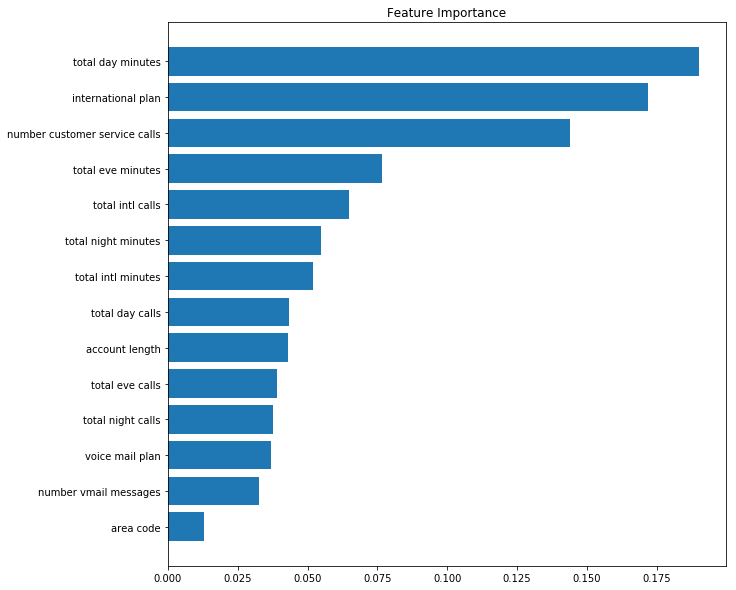

In [33]:
#Calculating feature importances
importances = final_Model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [train.columns[i] for i in indices]

# Creating plot
fig = plt.figure(figsize=(10,10))
plt.title("Feature Importance")

# Add horizontal bars
plt.barh(range(X.shape[1]),importances[indices],align = 'center')
plt.yticks(range(X.shape[1]), names)
plt.show()
#fig.savefig('feature_importance.png')

#### AUC & ROC Curve

ROC AUC: 0.91


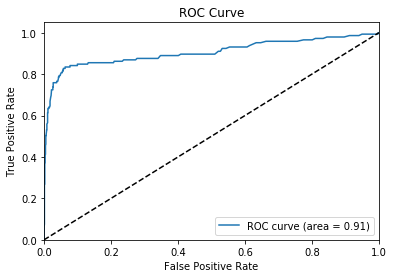

In [35]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, final_Model.predict_proba(X_test)[:,1])
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Final Test Data Predictions

In [36]:
# #Test Data Spliting parts target and Predictors
XX = test.iloc[:,:14].values  #predictors
yy = test.iloc[:,14].values   #target
yy=yy.astype('int')

In [37]:
#Predicting test data 
#pred(model_object=final_Model,predictors=XX,compare=yy)

Churn_Pred = final_Model.predict(XX)
cm = pd.crosstab(yy,Churn_Pred)
TN = cm.iloc[0,0]
FN = cm.iloc[1,0]
TP = cm.iloc[1,1]
FP = cm.iloc[0,1]
print("CONFUSION MATRIX ----->> ")
print(cm)
print()
##check accuracy of model
print('Accuracy :- ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
print('False Negative Rate :- ',round((FN*100)/(FN+TP),2))
print('False Postive Rate :- ',round((FP*100)/(FP+TN),2))

CONFUSION MATRIX ----->> 
col_0     0    1
row_0           
0      1170  273
1        46  178
()
('Accuracy :- ', 80.0)
('False Negative Rate :- ', 20.0)
('False Postive Rate :- ', 18.0)


In [38]:
print(classification_report(yy,Churn_Pred))

             precision    recall  f1-score   support

          0       0.96      0.81      0.88      1443
          1       0.39      0.79      0.53       224

avg / total       0.89      0.81      0.83      1667



#### AUC & ROC over Test Data

ROC AUC: 0.87


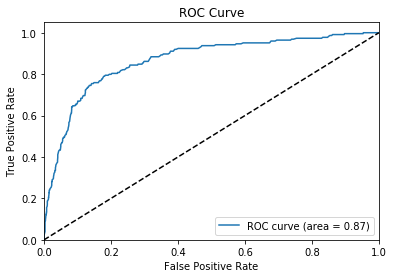

In [39]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(yy, final_Model.predict_proba(XX)[:,1])
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#### Saving the OutPut

In [41]:
test_original = pd.read_csv("Test_data.csv")
#output
test_original['Churn Prediction'] = Churn_Pred
test_original['Churn Prediction'] = test_original['Churn Prediction'].map({1 : 'True', 0 : 'False'})

#Predicted _Output
prob_output = pd.DataFrame(data=final_Model.predict_proba(XX),columns=("False_Probability","True_Probability"))
prob_output.head()

output = test_original[['state','area code','phone number','international plan','voice mail plan','Churn Prediction']]

In [43]:
#Saving Result with Class
output.to_csv('ChurnResut_Test',sep='\t', encoding='utf-8')
#Saving with Class and Probabilities
output.join(prob_output).to_csv('ChurnResult_Prob_Output.csv',sep='\t', encoding='utf-8')
#del(output)

In [68]:
#Cleaning by resetting everything
#%who
#%reset -f